<a href="https://colab.research.google.com/github/maulik-vyas/Tensors-Fundamentals/blob/main/End%20to%20End%20basic%20deep%20learning%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

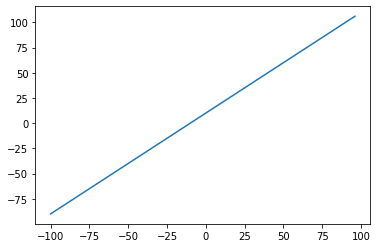

In [4]:
plt.plot(X, y)

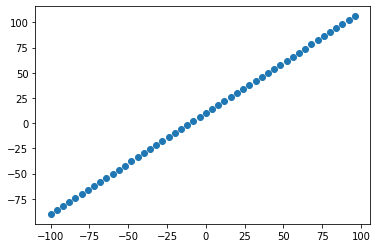

In [5]:
plt.scatter(X, y)

In [6]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(TensorShape([40]), TensorShape([40]), TensorShape([10]), TensorShape([10]))

In [7]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 1s 7ms/step - loss: 17.1341 - mae: 17.1341
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 16.3267 - mae: 16.3267
Epoch 3/10
2/2 [==============================] - 0s 27ms/step - loss: 15.5698 - mae: 15.5698
Epoch 4/10
2/2 [==============================] - 0s 8ms/step - loss: 14.8027 - mae: 14.8027
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 14.0456 - mae: 14.0456
Epoch 6/10
2/2 [==============================] - 0s 17ms/step - loss: 13.3200 - mae: 13.3200
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 12.5875 - mae: 12.5875
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 11.8444 - mae: 11.8444
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 11.1684 - mae: 11.1684
Epoch 10/10
2/2 [==============================] - 0s 4ms/step - loss: 10.5400 - mae: 10.5400


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


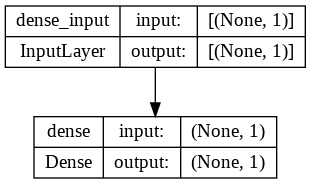

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

In [10]:
y_pred = model.predict([X_test])
y_pred

1/1 [==============================] - 0s 163ms/step


array([[46.054142],
       [49.12011 ],
       [52.186077],
       [55.25205 ],
       [58.318016],
       [61.383987],
       [64.44995 ],
       [67.51592 ],
       [70.581894],
       [73.64786 ]], dtype=float32)

In [11]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):

  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='g', label="Training data")
  plt.scatter(test_data, test_labels, c='b', label="Testing data")
  plt.scatter(test_labels, predictions, c='r', label="predictions")
  plt.legend()

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_pred.shape

(TensorShape([40]),
 TensorShape([40]),
 TensorShape([10]),
 TensorShape([10]),
 (10, 1))

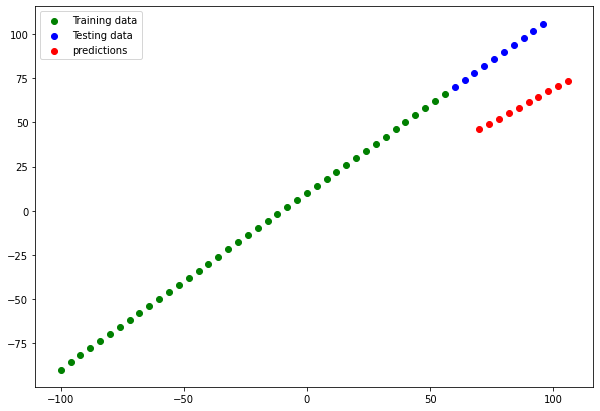

In [13]:
plot_predictions()

In [14]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 218ms/step - loss: 28.1490 - mae: 28.1490


[28.148998260498047, 28.148998260498047]

In [15]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [16]:
y_pred

array([[46.054142],
       [49.12011 ],
       [52.186077],
       [55.25205 ],
       [58.318016],
       [61.383987],
       [64.44995 ],
       [67.51592 ],
       [70.581894],
       [73.64786 ]], dtype=float32)

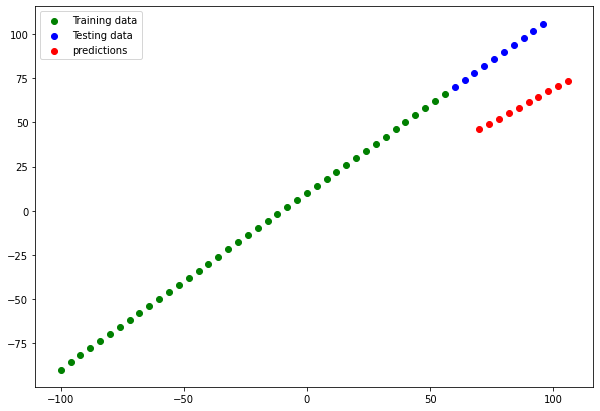

In [17]:
plot_predictions()

In [18]:
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([41.945858, 38.87989 , 35.813923, 32.74795 , 29.681982, 26.616013,
       23.550049, 20.484077, 17.534485, 15.081714], dtype=float32)>

In [19]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [20]:
y_pred.shape

(10, 1)

In [21]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[46.054142],
       [49.12011 ],
       [52.186077],
       [55.25205 ],
       [58.318016],
       [61.383987],
       [64.44995 ],
       [67.51592 ],
       [70.581894],
       [73.64786 ]], dtype=float32)>

In [22]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([46.054142, 49.12011 , 52.186077, 55.25205 , 58.318016, 61.383987,
       64.44995 , 67.51592 , 70.581894, 73.64786 ], dtype=float32)>

In [23]:
tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=28.148998>

In [24]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 29ms/step - loss: 28.1490 - mae: 28.1490


[28.148998260498047, 28.148998260498047]

In [25]:
tf.keras.losses.MSE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1891.4551 , 1643.6458 , 1414.6371 , 1204.4283 , 1013.0202 ,
        840.4121 ,  686.60486,  551.5975 ,  435.39044,  337.98398],
      dtype=float32)>

In [26]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 28ms/step - loss: 28.1490 - mae: 28.1490


[28.148998260498047, 28.148998260498047]

In [27]:
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=799.5636>

In [28]:
1.2580 ** 2

1.582564

In [29]:
tf.math.sqrt(1.6380794)

<tf.Tensor: shape=(), dtype=float32, numpy=1.2798748>

In [30]:
h = tf.keras.losses.Huber()
h(y_test, y_pred).numpy()

27.736567

In [45]:
#Make some functions to define MAE and MSE to reuse
def mae(y_true, y_pred):
  mae = tf.metrics.mean_absolute_error(
    y_true=y_true,
    y_pred=tf.squeeze(y_pred)
  )
  return mae

def mse(y_true, y_pred):
  mse = tf.metrics.mean_squared_error(
      y_true=y_true,
      y_pred=tf.squeeze(y_pred)
  )
  return mse

Let's experiment with 3 different models

**model 1** - Same as the original model, but run for 100 epochs

In [34]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 17.1341 - mae: 17.1341
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 16.3267 - mae: 16.3267
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 15.5698 - mae: 15.5698
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 14.8027 - mae: 14.8027
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.0456 - mae: 14.0456
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.3200 - mae: 13.3200
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 12.5875 - mae: 12.5875
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8444 - mae: 11.8444
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1684 - mae: 11.1684
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.5400 - mae: 10.5400
Epoch 11/100
2/2 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 60ms/step


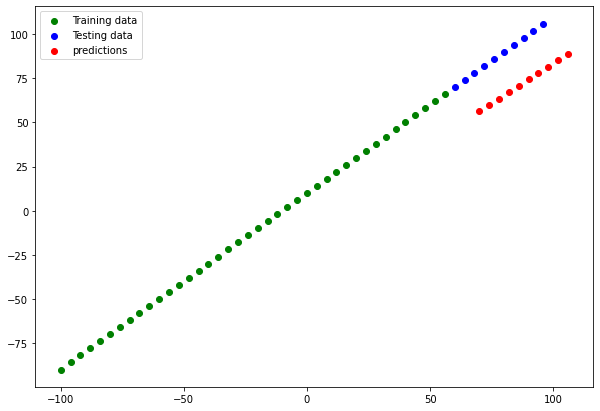

In [35]:
# Make and plot predictions on test data
y_pred1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred1)

In [40]:
mae(y_true=y_test, y_pred=y_pred1)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([31.732986, 28.115158, 24.49733 , 20.879509, 17.409344, 14.586311,
       12.415614, 10.963278, 10.158075, 10.      ], dtype=float32)>

In [41]:
y_test.shape, y_pred1.shape

(TensorShape([10]), (10, 1))

In [46]:
mae1 = mae(y_test, y_pred1)
mse1 = mse(y_test, y_pred1)
mae1, mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=15.4527645>,
 <tf.Tensor: shape=(), dtype=float32, numpy=239.99292>)

**model 2** 

*   2 Dense layers trained for 100 epochs

In [55]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 7ms/

1/1 [==============================] - 0s 52ms/step


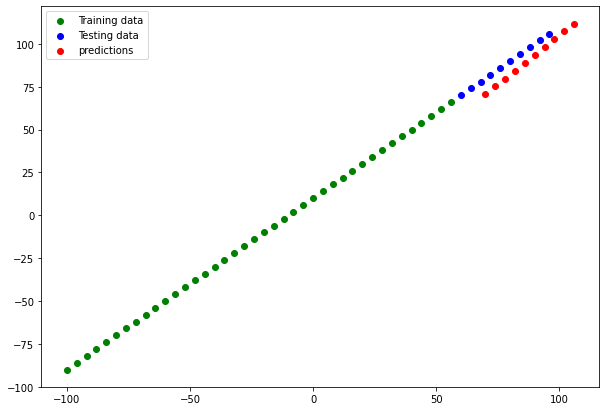

In [56]:
y_pred2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred2)

In [57]:
mae2 = mae(y_test, y_pred2)
mse2 = mse(y_test, y_pred2)
mae2, mse2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

**model 3** 

*   2 Dense layers trained for 500 epochs

In [58]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 4ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 5ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 5ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0s 3ms/

1/1 [==============================] - 0s 66ms/step


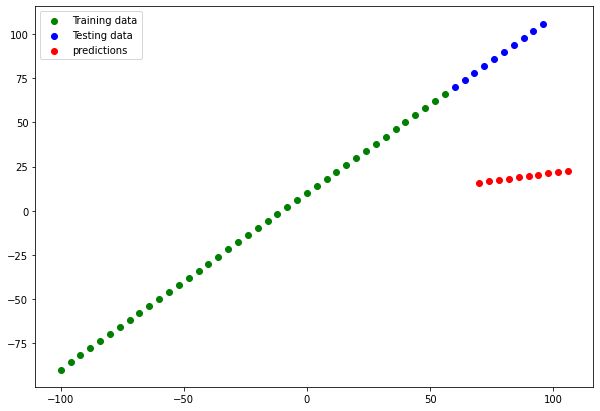

In [59]:
y_pred3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred3)

In [60]:
mae3 = mae(y_test, y_pred3)
mse3 = mse(y_test, y_pred3)
mae3, mse3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

In [64]:
import pandas as pd

model_results = [["model_1", mae1.numpy(), mse1.numpy()],
                 ["model_2", mae2.numpy(), mse2.numpy()],
                 ["model_3", mae3.numpy(), mse3.numpy()]]

results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
results

,model,mae,mse
0,model_1,15.452765,239.992920
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


In [65]:
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_2.save("best_model_savedmodel_format")

In [67]:
model_2.save("best_model_HDF5_format.h5")

In [68]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_savedmodel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 84ms/step


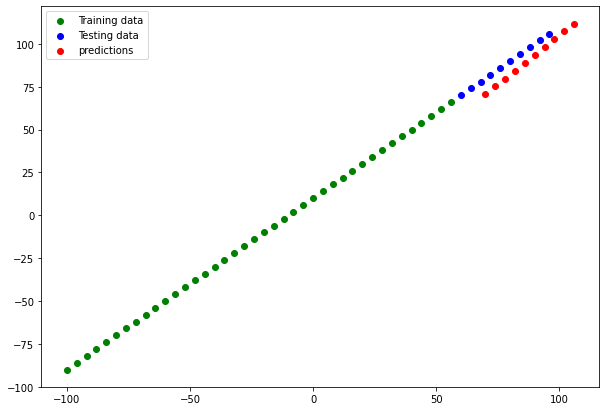

In [69]:
y_loaded_model = loaded_SavedModel_format.predict(X_test)
plot_predictions(predictions=y_loaded_model)

In [70]:
mae_loaded_model = mae(y_test, y_loaded_model)
mse_loaded_model = mse(y_test, y_loaded_model)
mae_loaded_model, mse_loaded_model

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [72]:
model_results = [["model1", mae1.numpy(), mse1.numpy()],
                 ["model2", mae2.numpy(), mse2.numpy()],
                 ["model3", mae3.numpy(), mse3.numpy()],
                 ["loaded_model", mae_loaded_model.numpy(), mse_loaded_model.numpy()]]

results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
results

,model,mae,mse
0,model1,15.452765,239.992920
1,model2,3.196940,13.070127
2,model3,68.713615,4808.027344
3,loaded_model,3.196940,13.070127


In [73]:
loaded_h5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                20        
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


1/1 [==============================] - 0s 68ms/step


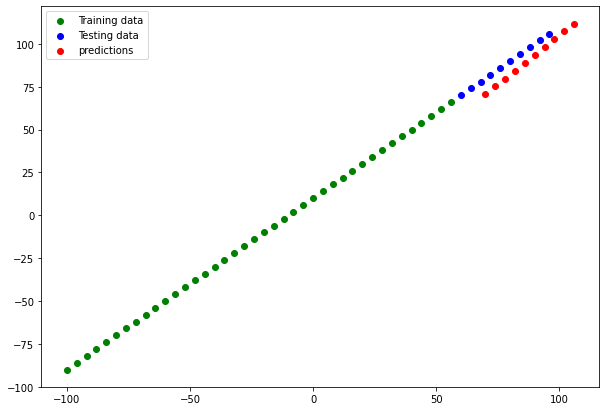

In [75]:
y_h5 = loaded_h5_format.predict(X_test)
plot_predictions(predictions=y_h5)

In [76]:
mae_h5 = mae(y_test, y_h5)
mse_h5 = mse(y_test, y_h5)
mae_h5, mse_h5

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

In [77]:
model_results = [["model1", mae1.numpy(), mse1.numpy()],
                 ["model2", mae2.numpy(), mse2.numpy()],
                 ["model3", mae3.numpy(), mse3.numpy()],
                 ["saved_model", mae_loaded_model.numpy(), mse_loaded_model.numpy()],
                 ["h5_model", mae_h5.numpy(), mse_h5.numpy()]]

results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
results

,model,mae,mse
0,model1,15.452765,239.992920
1,model2,3.196940,13.070127
2,model3,68.713615,4808.027344
3,saved_model,3.196940,13.070127
4,h5_model,3.196940,13.070127


In [79]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>